# DIC LAB 3 Problem 1 : Linear Model on National Hockey League data

Load the Libraries

In [1]:
library(ggplot2)
library(dplyr)
library("ggrepel")


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Read the data

In [2]:
nhldata <-read.csv("dataSets/NHLTop100.csv",header=T)

Show the data

In [3]:
head(nhldata)

Rank,Player,Team,Pos,X1st.NHL.Season,Last.NHL.Season,GP,G,A,P,X...,PIM,PP,SH,GW,GT,OT,Shots
1,Wayne Gretzky,,C,1979-1980,1998-1999,1487,894,1963,2857,518,577,204,73,91,12,1,5089
2,Mark Messier,,C,1979-1980,2003-2004,1756,694,1193,1887,210,1910,179,63,92,15,7,4219
3,Gordie Howe,,R,1946-1947,1979-1980,1767,801,1049,1850,87,1685,39,5,18,NA,NA,NA
4,Ron Francis,,C,1981-1982,2003-2004,1731,549,1249,1798,-10,979,188,12,79,13,3,3754
5,Marcel Dionne,,C,1971-1972,1988-1989,1348,731,1040,1771,28,600,234,19,74,1,2,5366
6,Steve Yzerman,,C,1983-1984,2005-2006,1514,692,1063,1755,202,924,202,50,94,12,8,4602


Print the column Names

In [4]:
colnames(nhldata)

[1] "Rank"            "Player"          "Team"            "Pos"            
 [5] "X1st.NHL.Season" "Last.NHL.Season" "GP"              "G"              
 [9] "A"               "P"               "X..."            "PIM"            
[13] "PP"              "SH"              "GW"              "GT"             
[17] "OT"              "Shots"

Change the columns Names as per the need 

**Begin**

In [5]:
names(nhldata)[names(nhldata)=="X..."] <- "PlusMinus"

In [6]:
names(nhldata)[names(nhldata)=="X1st.NHL.Season"] <- "1st.NHL.Season"

In [7]:
names(nhldata)[names(nhldata)=="G"] <- "Goals"

In [8]:
names(nhldata)[names(nhldata)=="A"] <- "Assists"

**End**

Show the names of the columns

In [9]:
names(nhldata)

[1] "Rank"            "Player"          "Team"            "Pos"            
 [5] "1st.NHL.Season"  "Last.NHL.Season" "GP"              "Goals"          
 [9] "Assists"         "P"               "PlusMinus"       "PIM"            
[13] "PP"              "SH"              "GW"              "GT"             
[17] "OT"              "Shots"

Summarize the data 

In [10]:
summary(nhldata)

      Rank                      Player        Team    Pos      1st.NHL.Season
 Min.   :  1.00   Adam Oates       : 1          :92   C:42   1980-1981:10    
 1st Qu.: 25.75   Al Macinnis      : 1   NJD    : 2   D:13   1979-1980: 7    
 Median : 50.50   Alex Delvecchio  : 1   BOS    : 1   L:15   1988-1989: 6    
 Mean   : 50.50   Alex Kovalev     : 1   CHI    : 1   R:30   1982-1983: 5    
 3rd Qu.: 75.25   Alexander Mogilny: 1   DAL    : 1          1984-1985: 5    
 Max.   :100.00   Andy Bathgate    : 1   DET    : 1          1990-1991: 5    
                  (Other)          :94   (Other): 2          (Other)  :62    
  Last.NHL.Season       GP           Goals          Assists      
 2012-2013:10     Min.   : 657   Min.   :185.0   Min.   : 421.0  
 2003-2004: 7     1st Qu.:1108   1st Qu.:391.0   1st Qu.: 585.0  
 2005-2006: 7     Median :1246   Median :470.5   Median : 700.5  
 2008-2009: 6     Mean   :1261   Mean   :475.4   Mean   : 741.8  
 1998-1999: 5     3rd Qu.:1408   3rd Qu.:550.8

In [11]:
colnames(nhldata)

[1] "Rank"            "Player"          "Team"            "Pos"            
 [5] "1st.NHL.Season"  "Last.NHL.Season" "GP"              "Goals"          
 [9] "Assists"         "P"               "PlusMinus"       "PIM"            
[13] "PP"              "SH"              "GW"              "GT"             
[17] "OT"              "Shots"

In [12]:
nhldata = nhldata %>% select(Player,GP,Goals,Assists)

Show the data 

In [13]:
head(nhldata)

Player,GP,Goals,Assists
Wayne Gretzky,1487,894,1963
Mark Messier,1756,694,1193
Gordie Howe,1767,801,1049
Ron Francis,1731,549,1249
Marcel Dionne,1348,731,1040
Steve Yzerman,1514,692,1063


Simply plot the above data to inspect the data 

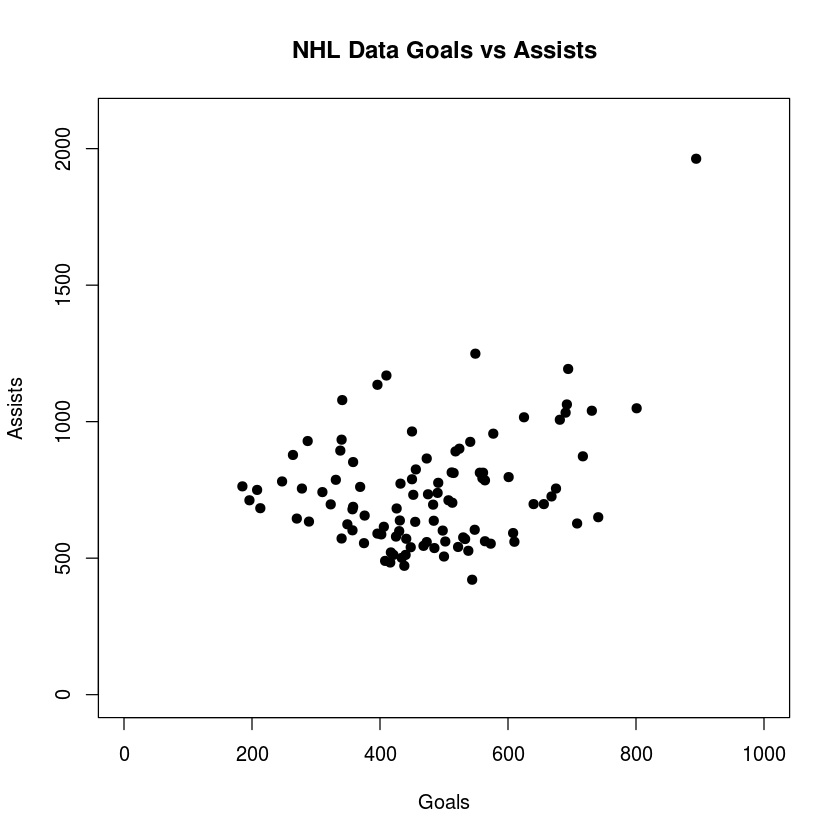

In [14]:
plot(nhldata$Goals,nhldata$Assists, pch=19, xlim=c(0,1000), ylim=c(0,2100),xlab="Goals", ylab="Assists",main="NHL Data Goals vs Assists")

# First Default Model

Create a Linear Regression Model between Assists and Goals field of the data

In [15]:
modelDefault = lm(Assists~Goals,data=nhldata)

Summarize the model 

In [16]:
summary(modelDefault)


Call:
lm(formula = Assists ~ Goals, data = nhldata)

Residuals:
    Min      1Q  Median      3Q     Max 
-356.51 -158.59  -10.29  125.08 1003.42 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 494.5135    74.6410   6.625 1.88e-09 ***
Goals         0.5202     0.1508   3.449 0.000832 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 207 on 98 degrees of freedom
Multiple R-squared:  0.1082,	Adjusted R-squared:  0.09913 
F-statistic: 11.89 on 1 and 98 DF,  p-value: 0.0008317


Draw the linear regression line obtained from above model

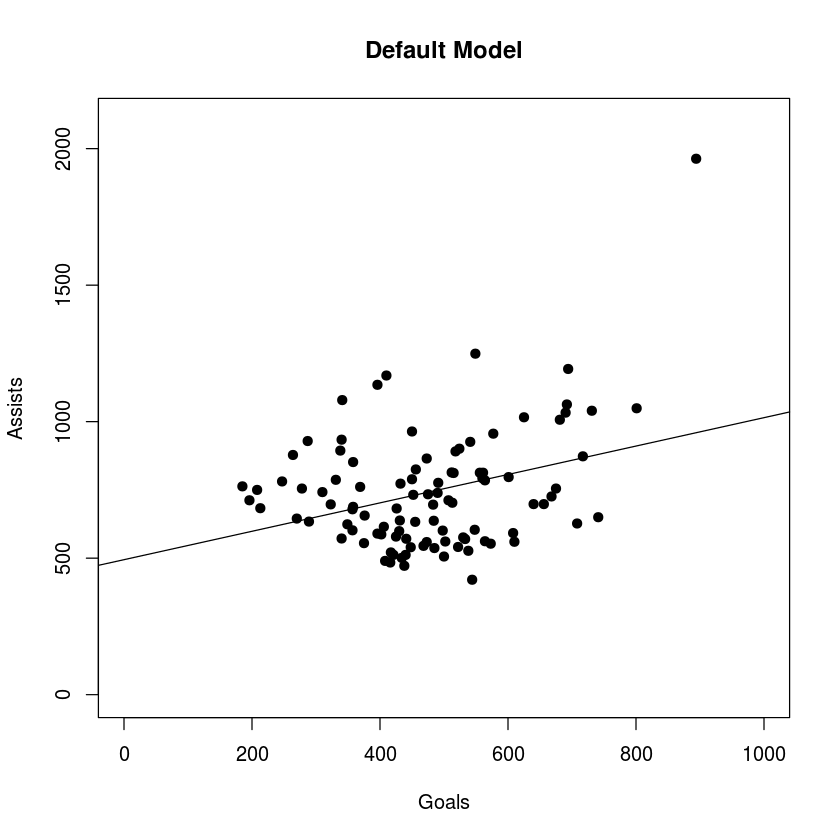

In [17]:
plot(nhldata$Goals,nhldata$Assists, pch=19, xlim=c(0,1000), ylim=c(0,2100),xlab="Goals", ylab="Assists",main="Default Model")
abline(modelDefault, col="black")

# Default model which passes thru origin

Create a Linear Regression Model between Assists and Goals field of the data

Adding a +0 in the lm function makes sure that the linear regression line pass thru origin

In [18]:
modelDefaultThruOrigin = lm(Assists~Goals+0,data=nhldata)

Show the summary of the above model

In [19]:
summary(modelDefaultThruOrigin)


Call:
lm(formula = Assists ~ Goals + 0, data = nhldata)

Residuals:
    Min      1Q  Median      3Q     Max 
-446.93 -137.40    1.88  159.73  639.58 

Coefficients:
      Estimate Std. Error t value Pr(>|t|)    
Goals  1.48033    0.05009   29.55   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 247.9 on 99 degrees of freedom
Multiple R-squared:  0.8982,	Adjusted R-squared:  0.8972 
F-statistic: 873.4 on 1 and 99 DF,  p-value: < 2.2e-16


Draw the linear regression line obtained from above model

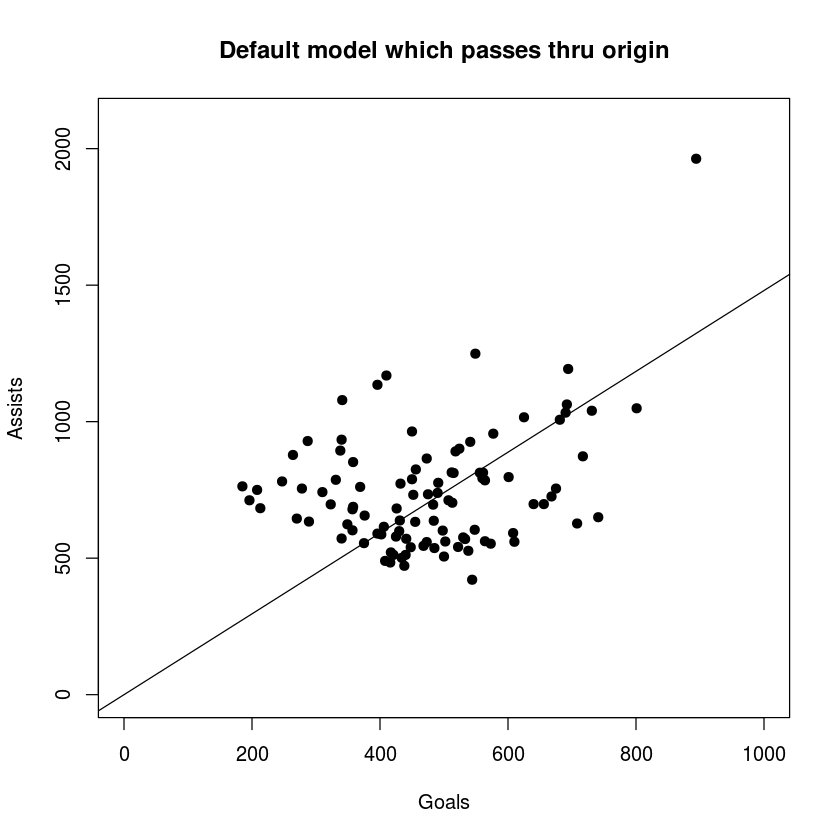

In [20]:
plot(nhldata$Goals,nhldata$Assists, pch=19, xlim=c(0,1000), ylim=c(0,2100),xlab="Goals", ylab="Assists",main="Default model which passes thru origin")
abline(modelDefaultThruOrigin, col="black")

# Model Passing Thru Wayne Gretzky

Create the model

If (x0,y0) is the point through which the regression line must pass, fit the model y−y0=β(x−x0)+ε, i.e., a linear regression with "no intercept" on a translated data set.

In [21]:
modelWayne = lm(I(Assists-1963)~I(Goals-894)+0,data=nhldata)

Summarize the above model

In [22]:
summary(modelWayne)


Call:
lm(formula = I(Assists - 1963) ~ I(Goals - 894) + 0, data = nhldata)

Residuals:
   Min     1Q Median     3Q    Max 
-902.2 -333.4 -145.4  103.3  703.4 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
I(Goals - 894)   2.6847     0.0853   31.48   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 375.7 on 99 degrees of freedom
Multiple R-squared:  0.9091,	Adjusted R-squared:  0.9082 
F-statistic: 990.7 on 1 and 99 DF,  p-value: < 2.2e-16


Draw the linear regression line obtained from above model

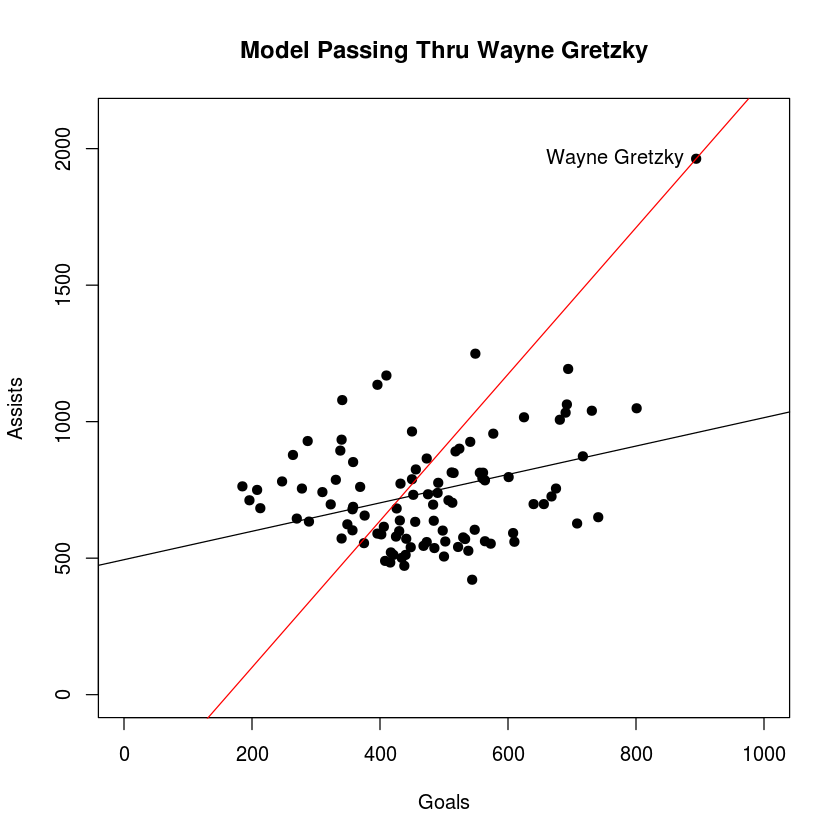

In [23]:
plot(nhldata$Goals,nhldata$Assists, pch=19, xlim=c(0,1000), ylim=c(0,2100),xlab="Goals", ylab="Assists",main="Model Passing Thru Wayne Gretzky")
abline(predict(modelWayne, newdata = list(Goals=0))+1963, coef(modelWayne), col='red')
abline(modelDefault, col="black")
text(x=894, y=1963, labels="Wayne Gretzky",cex= 1,pos=2)

# Model Passing Thru Wayne Gretzky and Origin

Create the linear regression model

By hit and trial we found out that adding 365 to the Assists and +0 to the model will make the model pass thru origin and Wayne Gretzky

In [24]:
modelWayneThruOrigin = lm(I(Assists+365)~I(Goals)+0,data=nhldata)

Summarize the above model

In [25]:
summary(modelWayneThruOrigin)


Call:
lm(formula = I(Assists + 365) ~ I(Goals) + 0, data = nhldata)

Residuals:
    Min      1Q  Median      3Q     Max 
-607.05 -119.48   27.06  234.41  723.03 

Coefficients:
         Estimate Std. Error t value Pr(>|t|)    
I(Goals)  2.18900    0.06386   34.28   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 316 on 99 degrees of freedom
Multiple R-squared:  0.9223,	Adjusted R-squared:  0.9215 
F-statistic:  1175 on 1 and 99 DF,  p-value: < 2.2e-16


Draw the linear regression line obtained from above model

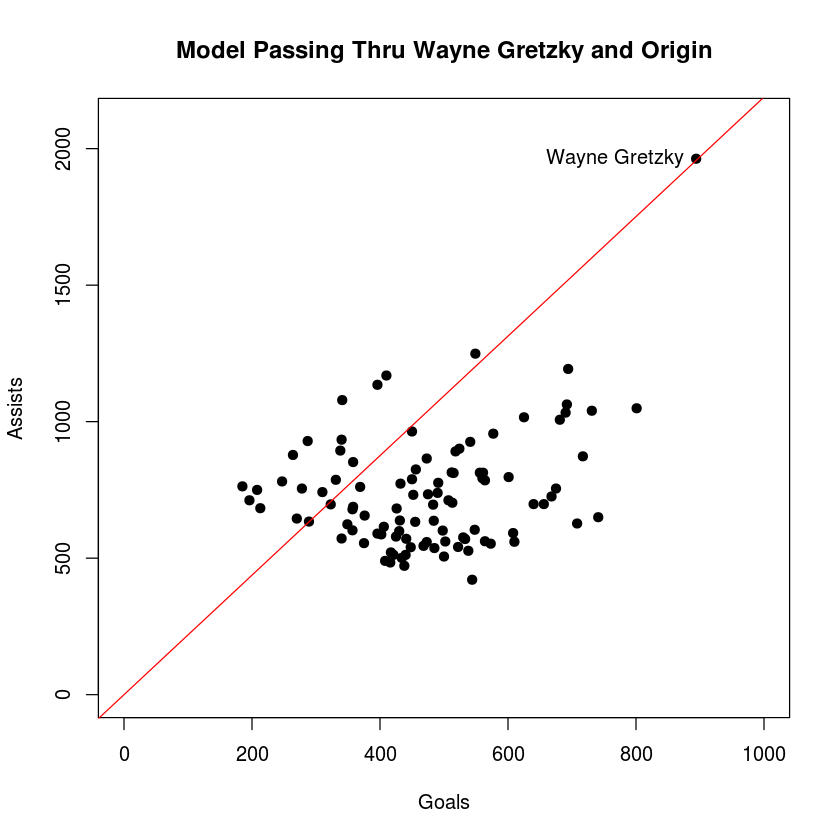

In [26]:
plot(nhldata$Goals,nhldata$Assists, pch=19, xlim=c(0,1000), ylim=c(0,2100),xlab="Goals", ylab="Assists",main="Model Passing Thru Wayne Gretzky and Origin")
abline(modelWayneThruOrigin, col="red")
text(x=894, y=1963, labels="Wayne Gretzky",cex= 1,pos=2)

# Model Passing Thru Patrick Kane

Read the data from the nhl website about Patrick Kane and add it to our data

In [27]:
patrickKane = data.frame(Player = "Patrick Kane", GP = 735, Goals = 285, Assists = 462)

Adding the data for Patrick Kane to the data

In [28]:
nhldata = rbind(nhldata,patrickKane)

Checking if the data has been added

In [29]:
nrow(nhldata)

[1] 101

Create the model which passes thru Patrick Kane

If (x0,y0) is the point through which the regression line must pass, fit the model y−y0=β(x−x0)+ε, i.e., a linear regression with "no intercept" on a translated data set. I

In [30]:
modelPatrick <- (lm(I(Assists-458)~I(Goals-282)+0, data = nhldata))

Summarize the above model

In [31]:
summary(modelPatrick)


Call:
lm(formula = I(Assists - 458) ~ I(Goals - 282) + 0, data = nhldata)

Residuals:
    Min      1Q  Median      3Q     Max 
-338.35 -112.92   39.85  167.95  801.09 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
I(Goals - 282)   1.1502     0.0973   11.82   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 230.8 on 100 degrees of freedom
Multiple R-squared:  0.5829,	Adjusted R-squared:  0.5787 
F-statistic: 139.7 on 1 and 100 DF,  p-value: < 2.2e-16


Draw the linear regression line obtained from above model

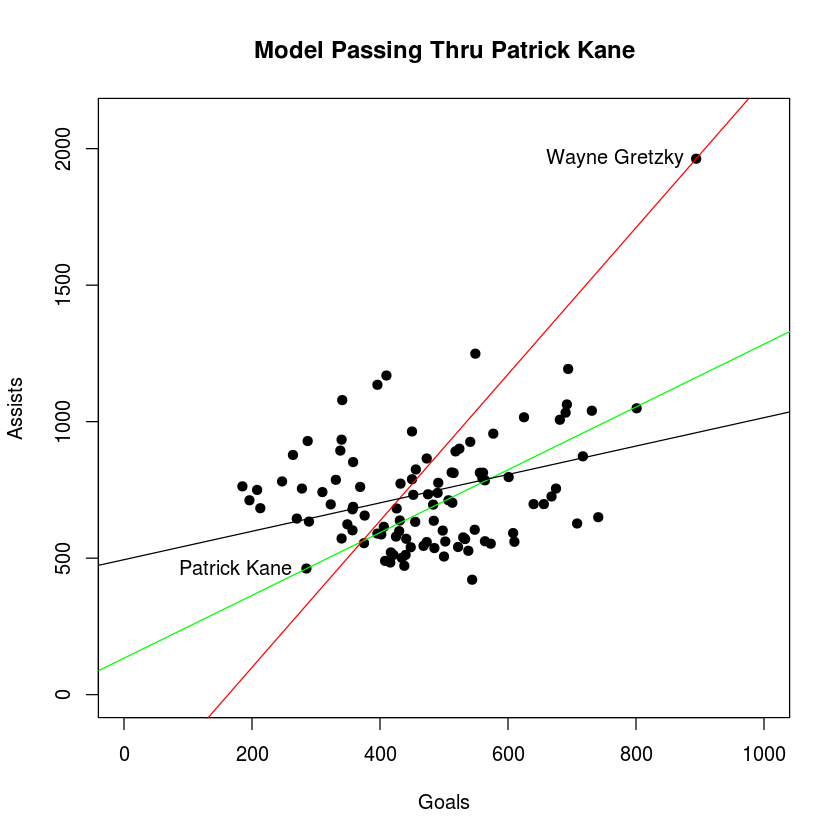

In [32]:
plot(nhldata$Goals,nhldata$Assists, pch=19, xlim=c(0,1000), ylim=c(0,2100),xlab="Goals", ylab="Assists",main="Model Passing Thru Patrick Kane")
abline(predict(modelPatrick, newdata = list(Goals=0))+458, coef(modelPatrick), col='green')
abline(predict(modelWayne, newdata = list(Goals=0))+1963, coef(modelWayne), col='red')
abline(modelDefault, col="black")
text(x=894, y=1963, labels="Wayne Gretzky",cex= 1,pos=2)
text(x=282, y=458, labels="Patrick Kane",cex= 1,pos=2)

# Model Passing Thru Patrick Kane and Origin

Create the LM model 

By hit and trial we found out that adding 75 to the Assists and +0 to the model will make the model pass thru origin and Patrick Kane

In [33]:
modelPatrickThruOrigin <- (lm(I(Assists+75)~I(Goals)+0, data = nhldata))

Draw the linear regression line obtained from above model

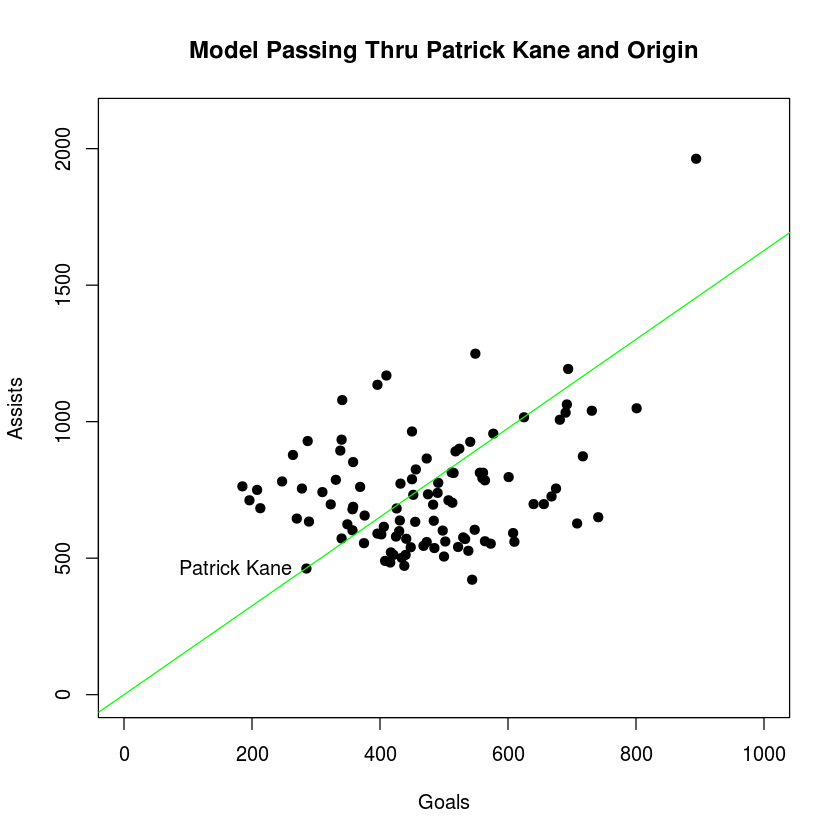

In [34]:
plot(nhldata$Goals,nhldata$Assists, pch=19, xlim=c(0,1000), ylim=c(0,2100),xlab="Goals", ylab="Assists",main="Model Passing Thru Patrick Kane and Origin")
abline(modelPatrickThruOrigin, col="green")
text(x=282, y=458, labels="Patrick Kane",cex= 1,pos=2)

summarize the data for above model

In [35]:
summary(modelPatrickThruOrigin)


Call:
lm(formula = I(Assists + 75) ~ I(Goals) + 0, data = nhldata)

Residuals:
    Min      1Q  Median      3Q     Max 
-480.46 -130.03   12.25  170.52  599.26 

Coefficients:
         Estimate Std. Error t value Pr(>|t|)    
I(Goals)  1.62681    0.05223   31.15   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 258.9 on 100 degrees of freedom
Multiple R-squared:  0.9066,	Adjusted R-squared:  0.9056 
F-statistic: 970.1 on 1 and 100 DF,  p-value: < 2.2e-16


Create a function to get the P-Value from a given model

In [36]:
getPValue <- function (modelobject) {
    if (class(modelobject) != "lm") stop("Not an object of class 'lm' ")
    f <- summary(modelobject)$fstatistic
    p <- pf(f[1],f[2],f[3],lower.tail=F)
    attributes(p) <- NULL
    return(p)
}

Create a function to get a dataframe containg the R Squared Value and P Value for a given model

In [37]:
getValues = function(model,modelNameStr){
    rSquaredVal = summary(model)$r.squared 
    pVal = getPValue(model)
    tempSum = data.frame(modelName = modelNameStr, R.Squared.Value = rSquaredVal, pValue = pVal)
    
    return (tempSum)
}

Create a data frame to hold the data for different models

In [38]:
modelSummary = data.frame(modelName = character(), R.Squared.Value = double(), pValue = double())

Populate the data frame with all the models

In [39]:
modelSummary = rbind(modelSummary,getValues(modelDefault,"Default Model"))
modelSummary = rbind(modelSummary,getValues(modelDefaultThruOrigin,"Default Model via Origin"))
modelSummary = rbind(modelSummary,getValues(modelWayne,"Model Via Wayne Gretzky"))
modelSummary = rbind(modelSummary,getValues(modelWayneThruOrigin,"Model Via Wayne Gretzky and Origin"))
modelSummary = rbind(modelSummary,getValues(modelPatrick,"Model Via Patrick Kane"))
modelSummary = rbind(modelSummary,getValues(modelPatrickThruOrigin,"Model Via Patrick Kane and Origin"))

Show the data in for various models

In [40]:
modelSummary

modelName,R.Squared.Value,pValue
Default Model,0.1082305,8.317169e-04
Default Model via Origin,0.8981861,6.490898e-51
Model Via Wayne Gretzky,0.9091456,2.298260e-53
Model Via Wayne Gretzky and Origin,0.9222969,9.929666e-57
Model Via Patrick Kane,0.5828844,1.066321e-20
Model Via Patrick Kane and Origin,0.9065539,2.816991e-53


# Conclusion : 

By looking at the above data we can see that whenever we made any model pass thru origin its R squared value increase and P Value decreases.
Hence we can say that making a linear regression model pass thru gives a better fitting line in the above given data models

# References

1. http://stackoverflow.com/questions/5587676/pull-out-p-values-and-r-squared-from-a-linear-regression
2. https://stat.ethz.ch/pipermail/r-help/2005-December/084308.html
3. http://data.princeton.edu/R/linearModels.html
4. http://stats.stackexchange.com/questions/12484/constrained-linear-regression-through-a-specified-point
5. Class Notes